# 1. Import and Install Dependencies

In [71]:
!pip install tensorflow

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Acer\\.conda\\envs\\rl_course\\Lib\\site-packages\\google\\~rotobuf\\internal\\_api_implementation.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
     ---------------------------------------- 0.0/266.3 MB ? eta -:--:--
     ---------------------------------------- 0.2/266.3 MB 6.9 MB/s eta 0:00:39
     ---------------------------------------- 0.3/266.3 MB 3.9 MB/s eta 0:01:08
     ---------------------------------------- 0.5/266.3 MB 4.3 MB/s eta 0:01:03
     ---------------------------------------- 0.8/266.3 MB 4.3 MB/s eta 0:01:02
     ---------------------------------------- 0.9/266.3 MB 3.9 MB/s eta 0:01:09
     ---------------------------------------- 1.1/266.3 MB 3.7 MB/s eta 0:01:12
     ---------------------------------------- 1.3/266.3 MB 3.9 MB/s eta 0:01:08
     ---------------------------------------- 1.4/266.3 MB 3.8 MB/s eta 0:01:10
     ---------------------------------------- 1.6/266.3 MB 3.8 MB/s eta 0:01:10
     ---------------------------------------- 1.8/266.3 MB 3.8 MB/s eta 0:01:11
     ---------------------------------------- 2.0/266.3 MB 

  Using cached tensorflow-2.11.0-cp310-cp310-win_amd64.whl (1.9 kB)
     ---------------------------------------- 0.0/266.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/266.3 MB ? eta -:--:--
     ---------------------------------------- 0.1/266.3 MB 1.7 MB/s eta 0:02:33
     ---------------------------------------- 0.2/266.3 MB 2.0 MB/s eta 0:02:16
     ---------------------------------------- 0.4/266.3 MB 3.0 MB/s eta 0:01:30
     ---------------------------------------- 0.5/266.3 MB 2.6 MB/s eta 0:01:44
     ---------------------------------------- 0.7/266.3 MB 2.8 MB/s eta 0:01:34
     ---------------------------------------- 0.8/266.3 MB 3.0 MB/s eta 0:01:30
     ---------------------------------------- 1.0/266.3 MB 3.2 MB/s eta 0:01:24
     ---------------------------------------- 1.1/266.3 MB 3.0 MB/s eta 0:01:30
     ---------------------------------------- 1.2/266.3 MB 2.9 MB/s eta 0:01:32
     ---------------------------------------- 1.4/266.3 MB 2.9 MB/

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp
import time

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [5]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        image, results = mediapipe_detection(frame, holistic)
#         print(results)

        draw_styled_landmarks(image, results)
        cv2.imshow('Opencv Feed', image)
        if cv2.waitKey(10)  & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [6]:
def draw_landmark(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [7]:
draw_styled_landmarks(frame, results)

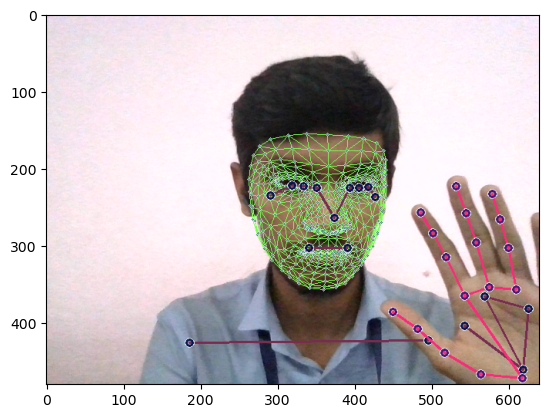

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint value

In [9]:
results.left_hand_landmarks

landmark {
  x: 0.9669809937477112
  y: 0.9846954345703125
  z: 4.4816704303229926e-07
}
landmark {
  x: 0.8822805881500244
  y: 0.9743672609329224
  z: -0.03865072876214981
}
landmark {
  x: 0.8084229826927185
  y: 0.9151782989501953
  z: -0.0641724020242691
}
landmark {
  x: 0.7544808387756348
  y: 0.8513070940971375
  z: -0.08543098717927933
}
landmark {
  x: 0.704362690448761
  y: 0.8044372797012329
  z: -0.10675997287034988
}
landmark {
  x: 0.848515510559082
  y: 0.762243926525116
  z: -0.044687360525131226
}
landmark {
  x: 0.8111857175827026
  y: 0.6577074527740479
  z: -0.07463181018829346
}
landmark {
  x: 0.7851678729057312
  y: 0.5921746492385864
  z: -0.09871788322925568
}
landmark {
  x: 0.760899543762207
  y: 0.5360280275344849
  z: -0.11630481481552124
}
landmark {
  x: 0.8994342684745789
  y: 0.7380699515342712
  z: -0.046444982290267944
}
landmark {
  x: 0.8723640441894531
  y: 0.618452787399292
  z: -0.07242482155561447
}
landmark {
  x: 0.8518011569976807
  y: 0.537

In [8]:
# pose = []

# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x, res.y, res.z,] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh = np.array([[res.x, res.y, res.z,] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z,] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [11]:
result_test = extract_keypoints(results)

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.4434332 ,  0.9050194 , -0.87625837, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for collection

In [14]:
DATA_PATH = os.path.join('MP_DATA')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

In [15]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint values for training and Testing

In [12]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        
        for sequence in range(no_sequences):
            
            for frame_num in range(sequence_length): 
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
        #         print(results)

                draw_styled_landmarks(image, results)
                
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                
                cv2.imshow('Opencv Feed', image)
                
                if cv2.waitKey(10)  & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocessing data and create labels and features

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
label_map = {label:num for num, label in enumerate(actions)}

In [17]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [18]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [19]:
np.array(sequences).shape

(90, 30, 1662)

In [20]:
np.array(labels).shape

(90,)

In [21]:
X = np.array(sequences)

In [22]:
y = to_categorical(labels).astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [24]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Network model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [26]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [27]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [28]:
actions.shape[0]

3

In [29]:
res = [.7, 0.2, 0.1]

In [30]:
actions[np.argmax(res)]

'hello'

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [101]:
model.fit(X_train, y_train, epochs=1500, callbacks=[tb_callback])

Epoch 1/1500
3/3 [==============================] - 8s 110ms/step - loss: 2.6524 - categorical_accuracy: 0.3412
Epoch 2/1500
3/3 [==============================] - 0s 100ms/step - loss: 2.6025 - categorical_accuracy: 0.4000
Epoch 3/1500
3/3 [==============================] - 0s 95ms/step - loss: 27.6487 - categorical_accuracy: 0.3529
Epoch 4/1500
3/3 [==============================] - 0s 95ms/step - loss: 34.7555 - categorical_accuracy: 0.2706
Epoch 5/1500
3/3 [==============================] - 0s 110ms/step - loss: 41.7437 - categorical_accuracy: 0.2706
Epoch 6/1500
3/3 [==============================] - 0s 105ms/step - loss: 20.7149 - categorical_accuracy: 0.2706
Epoch 7/1500
3/3 [==============================] - 0s 100ms/step - loss: 32.2524 - categorical_accuracy: 0.3412
Epoch 8/1500
3/3 [==============================] - 0s 95ms/step - loss: 41.8984 - categorical_accuracy: 0.2941
Epoch 9/1500
3/3 [==============================] - 0s 95ms/step - loss: 54.0401 - categorical_accura

3/3 [==============================] - 0s 95ms/step - loss: 0.5134 - categorical_accuracy: 0.7647
Epoch 146/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.4982 - categorical_accuracy: 0.7529
Epoch 147/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.5060 - categorical_accuracy: 0.7294
Epoch 148/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.5476 - categorical_accuracy: 0.7294
Epoch 149/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.5189 - categorical_accuracy: 0.7176
Epoch 150/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.5496 - categorical_accuracy: 0.7059
Epoch 151/1500
3/3 [==============================] - 0s 113ms/step - loss: 0.5155 - categorical_accuracy: 0.7059
Epoch 152/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.5002 - categorical_accuracy: 0.7647
Epoch 153/1500
3/3 [==============================] - 0s 110ms/step - loss: 0.5081 - categorical_accuracy: 0

3/3 [==============================] - 0s 96ms/step - loss: 0.6418 - categorical_accuracy: 0.6824
Epoch 290/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.7138 - categorical_accuracy: 0.6706
Epoch 291/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.6162 - categorical_accuracy: 0.6941
Epoch 292/1500
3/3 [==============================] - 0s 118ms/step - loss: 0.7156 - categorical_accuracy: 0.6706
Epoch 293/1500
3/3 [==============================] - 0s 96ms/step - loss: 0.6974 - categorical_accuracy: 0.6824
Epoch 294/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.6232 - categorical_accuracy: 0.7412
Epoch 295/1500
3/3 [==============================] - 0s 104ms/step - loss: 0.6913 - categorical_accuracy: 0.6824
Epoch 296/1500
3/3 [==============================] - 0s 97ms/step - loss: 0.7098 - categorical_accuracy: 0.6706
Epoch 297/1500
3/3 [==============================] - 0s 101ms/step - loss: 0.6222 - categorical_accuracy: 

3/3 [==============================] - 0s 105ms/step - loss: 0.5606 - categorical_accuracy: 0.7529
Epoch 362/1500
3/3 [==============================] - 0s 110ms/step - loss: 0.5872 - categorical_accuracy: 0.7529
Epoch 363/1500
3/3 [==============================] - 0s 105ms/step - loss: 0.5979 - categorical_accuracy: 0.7412
Epoch 364/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.5804 - categorical_accuracy: 0.7059
Epoch 365/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.6289 - categorical_accuracy: 0.6941
Epoch 366/1500
3/3 [==============================] - 0s 122ms/step - loss: 0.5541 - categorical_accuracy: 0.7765
Epoch 367/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.6641 - categorical_accuracy: 0.7412
Epoch 368/1500
3/3 [==============================] - 0s 110ms/step - loss: 0.6168 - categorical_accuracy: 0.7294
Epoch 369/1500
3/3 [==============================] - 0s 165ms/step - loss: 0.6659 - categorical_accurac

3/3 [==============================] - 1s 172ms/step - loss: 0.5208 - categorical_accuracy: 0.7765
Epoch 434/1500
3/3 [==============================] - 0s 150ms/step - loss: 0.6521 - categorical_accuracy: 0.7176
Epoch 435/1500
3/3 [==============================] - 0s 120ms/step - loss: 0.5568 - categorical_accuracy: 0.7059
Epoch 436/1500
3/3 [==============================] - 0s 117ms/step - loss: 0.5446 - categorical_accuracy: 0.7647
Epoch 437/1500
3/3 [==============================] - 0s 110ms/step - loss: 0.5454 - categorical_accuracy: 0.7647
Epoch 438/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.5259 - categorical_accuracy: 0.8000
Epoch 439/1500
3/3 [==============================] - 0s 104ms/step - loss: 0.5385 - categorical_accuracy: 0.7529
Epoch 440/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.5152 - categorical_accuracy: 0.7765
Epoch 441/1500
3/3 [==============================] - 0s 130ms/step - loss: 0.5806 - categorical_accuracy

3/3 [==============================] - 0s 114ms/step - loss: 0.6381 - categorical_accuracy: 0.6941
Epoch 506/1500
3/3 [==============================] - 0s 113ms/step - loss: 0.5689 - categorical_accuracy: 0.7059
Epoch 507/1500
3/3 [==============================] - 0s 103ms/step - loss: 0.4936 - categorical_accuracy: 0.7765
Epoch 508/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.5851 - categorical_accuracy: 0.7882
Epoch 509/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.4913 - categorical_accuracy: 0.7647
Epoch 510/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.4587 - categorical_accuracy: 0.7765
Epoch 511/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.5042 - categorical_accuracy: 0.7529
Epoch 512/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.4825 - categorical_accuracy: 0.7882
Epoch 513/1500
3/3 [==============================] - 0s 95ms/step - loss: 0.6263 - categorical_accuracy: 

3/3 [==============================] - 0s 95ms/step - loss: 0.3668 - categorical_accuracy: 0.8000
Epoch 650/1500
3/3 [==============================] - 0s 94ms/step - loss: 0.3851 - categorical_accuracy: 0.8235
Epoch 651/1500
3/3 [==============================] - 0s 124ms/step - loss: 0.3684 - categorical_accuracy: 0.8235
Epoch 652/1500
3/3 [==============================] - 0s 110ms/step - loss: 0.3574 - categorical_accuracy: 0.8353
Epoch 653/1500
3/3 [==============================] - 0s 106ms/step - loss: 0.4106 - categorical_accuracy: 0.8118
Epoch 654/1500
3/3 [==============================] - 0s 97ms/step - loss: 0.4827 - categorical_accuracy: 0.7882
Epoch 655/1500
3/3 [==============================] - 0s 104ms/step - loss: 0.4037 - categorical_accuracy: 0.7412
Epoch 656/1500
3/3 [==============================] - 0s 94ms/step - loss: 0.3810 - categorical_accuracy: 0.8235
Epoch 657/1500
3/3 [==============================] - 0s 100ms/step - loss: 0.3643 - categorical_accuracy: 

3/3 [==============================] - 0s 135ms/step - loss: 0.4219 - categorical_accuracy: 0.8000
Epoch 794/1500
3/3 [==============================] - 0s 140ms/step - loss: 0.4629 - categorical_accuracy: 0.7647
Epoch 795/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.4216 - categorical_accuracy: 0.7647
Epoch 796/1500
3/3 [==============================] - 0s 154ms/step - loss: 0.5713 - categorical_accuracy: 0.7412
Epoch 797/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.8503 - categorical_accuracy: 0.6353
Epoch 798/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.8536 - categorical_accuracy: 0.6941
Epoch 799/1500
3/3 [==============================] - 0s 108ms/step - loss: 0.7149 - categorical_accuracy: 0.6706
Epoch 800/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.5903 - categorical_accuracy: 0.7176
Epoch 801/1500
3/3 [==============================] - 0s 115ms/step - loss: 0.4777 - categorical_accura

3/3 [==============================] - 0s 152ms/step - loss: 0.2714 - categorical_accuracy: 0.8588
Epoch 938/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.2273 - categorical_accuracy: 0.8941
Epoch 939/1500
3/3 [==============================] - 0s 108ms/step - loss: 0.2804 - categorical_accuracy: 0.8706
Epoch 940/1500
3/3 [==============================] - 0s 112ms/step - loss: 0.2582 - categorical_accuracy: 0.8706
Epoch 941/1500
3/3 [==============================] - 0s 148ms/step - loss: 0.2230 - categorical_accuracy: 0.9176
Epoch 942/1500
3/3 [==============================] - 0s 124ms/step - loss: 0.2439 - categorical_accuracy: 0.8706
Epoch 943/1500
3/3 [==============================] - 0s 112ms/step - loss: 0.2230 - categorical_accuracy: 0.8706
Epoch 944/1500
3/3 [==============================] - 0s 112ms/step - loss: 0.2722 - categorical_accuracy: 0.8706
Epoch 945/1500
3/3 [==============================] - 0s 152ms/step - loss: 0.2397 - categorical_accura

3/3 [==============================] - 0s 129ms/step - loss: 0.3167 - categorical_accuracy: 0.8353
Epoch 1080/1500
3/3 [==============================] - 0s 109ms/step - loss: 0.2882 - categorical_accuracy: 0.8235
Epoch 1081/1500
3/3 [==============================] - 0s 133ms/step - loss: 0.2883 - categorical_accuracy: 0.8471
Epoch 1082/1500
3/3 [==============================] - 0s 129ms/step - loss: 0.2384 - categorical_accuracy: 0.8941
Epoch 1083/1500
3/3 [==============================] - 0s 113ms/step - loss: 0.2274 - categorical_accuracy: 0.8941
Epoch 1084/1500
3/3 [==============================] - 0s 129ms/step - loss: 0.4010 - categorical_accuracy: 0.8353
Epoch 1085/1500
3/3 [==============================] - 0s 108ms/step - loss: 0.3958 - categorical_accuracy: 0.7882
Epoch 1086/1500
3/3 [==============================] - 0s 126ms/step - loss: 0.2543 - categorical_accuracy: 0.8706
Epoch 1087/1500
3/3 [==============================] - 0s 129ms/step - loss: 0.3246 - categorica

3/3 [==============================] - 0s 159ms/step - loss: 0.3757 - categorical_accuracy: 0.8353
Epoch 1222/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.3680 - categorical_accuracy: 0.8118
Epoch 1223/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.3979 - categorical_accuracy: 0.8588
Epoch 1224/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.3370 - categorical_accuracy: 0.8235
Epoch 1225/1500
3/3 [==============================] - 0s 158ms/step - loss: 0.3372 - categorical_accuracy: 0.8353
Epoch 1226/1500
3/3 [==============================] - 1s 163ms/step - loss: 0.2684 - categorical_accuracy: 0.8471
Epoch 1227/1500
3/3 [==============================] - 0s 108ms/step - loss: 0.2550 - categorical_accuracy: 0.8706
Epoch 1228/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.2862 - categorical_accuracy: 0.8471
Epoch 1229/1500
3/3 [==============================] - 0s 125ms/step - loss: 0.3030 - categorica

3/3 [==============================] - 0s 107ms/step - loss: 0.4206 - categorical_accuracy: 0.8000
Epoch 1364/1500
3/3 [==============================] - 0s 109ms/step - loss: 0.3768 - categorical_accuracy: 0.8235
Epoch 1365/1500
3/3 [==============================] - 0s 138ms/step - loss: 0.3589 - categorical_accuracy: 0.8706
Epoch 1366/1500
3/3 [==============================] - 0s 126ms/step - loss: 0.3131 - categorical_accuracy: 0.8706
Epoch 1367/1500
3/3 [==============================] - 0s 114ms/step - loss: 0.3810 - categorical_accuracy: 0.7412
Epoch 1368/1500
3/3 [==============================] - 0s 130ms/step - loss: 0.3901 - categorical_accuracy: 0.7882
Epoch 1369/1500
3/3 [==============================] - 0s 126ms/step - loss: 0.3877 - categorical_accuracy: 0.7882
Epoch 1370/1500
3/3 [==============================] - 0s 116ms/step - loss: 0.4073 - categorical_accuracy: 0.8000
Epoch 1371/1500
3/3 [==============================] - 0s 120ms/step - loss: 0.3443 - categorica

In [102]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Prediction

In [33]:
res = model.predict(X_test)

1/1 [==============================] - 1s 853ms/step


In [34]:
actions[np.argmax(res[2])]

'thanks'

In [35]:
actions[np.argmax(y_test[2])]

'thanks'

# 9. Save Weights 

In [113]:
model.save('actions.h5')

In [32]:
model.load_weights('actions.h5')

# 10. Evaluation using Confusion matrix and Accuracy

In [36]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [37]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 61ms/step


In [38]:
ytue = np.argmax(y_test,axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [39]:
multilabel_confusion_matrix(ytue,yhat)

array([[[4, 0],
        [0, 1]],

       [[2, 0],
        [0, 3]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [40]:
accuracy_score(ytue, yhat)

1.0

# 11. Test in real Time

In [41]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [42]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 40ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 40ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 34ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 45ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 39ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 43ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 37ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 32ms/step
thanks
<class 'media

In [43]:
res

array([1.3657211e-04, 1.5376647e-03, 9.9832577e-01], dtype=float32)

In [44]:
cap.release()
cv2.destroyAllWindows()